In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the edges data
edges_file = 'email-Eu-core.txt'
edges_df = pd.read_csv(edges_file, sep=' ', header=None, names=['node_1', 'node_2'])

# Load the labels data
labels_file = 'email-Eu-core-department-labels.txt'
labels_df = pd.read_csv(labels_file, sep=' ', header=None, names=['node', 'department'])

# Display the first few rows of each DataFrame
print("Edges DataFrame:")
print(edges_df.head())

print("\nLabels DataFrame:")
print(labels_df.head())


Edges DataFrame:
   node_1  node_2
0       0       1
1       2       3
2       2       4
3       5       6
4       5       7

Labels DataFrame:
   node  department
0     0           1
1     1           1
2     2          21
3     3          21
4     4          21


In [2]:
# Basic information about edges dataset
print("\nEdges DataFrame Info:")
print(edges_df.info())

# Basic information about labels dataset
print("\nLabels DataFrame Info:")
print(labels_df.info())



Edges DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25571 entries, 0 to 25570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   node_1  25571 non-null  int64
 1   node_2  25571 non-null  int64
dtypes: int64(2)
memory usage: 399.7 KB
None

Labels DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   node        1005 non-null   int64
 1   department  1005 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB
None


In [3]:
# Statistical summary of edges dataset
print("\nEdges DataFrame Statistical Summary:")
print(edges_df.describe())

# Statistical summary of labels dataset
print("\nLabels DataFrame Statistical Summary:")
print(labels_df.describe())



Edges DataFrame Statistical Summary:
             node_1        node_2
count  25571.000000  25571.000000
mean     304.392163    317.206484
std      235.818020    237.893564
min        0.000000      0.000000
25%      115.000000    126.000000
50%      254.000000    272.000000
75%      437.500000    458.000000
max     1003.000000   1004.000000

Labels DataFrame Statistical Summary:
              node   department
count  1005.000000  1005.000000
mean    502.000000    13.987065
std     290.262812    10.356534
min       0.000000     0.000000
25%     251.000000     5.000000
50%     502.000000    14.000000
75%     753.000000    21.000000
max    1004.000000    41.000000


In [4]:
# Basic network properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
num_connected_components = nx.number_connected_components(G)

properties = {
    'Number of Nodes': num_nodes,
    'Number of Edges': num_edges,
    'Density': density,
    'Number of Connected Components': num_connected_components
}

properties_df = pd.DataFrame(list(properties.items()), columns=['Property', 'Value'])
properties_df


NameError: name 'G' is not defined

In [ ]:
# Check for missing values in edges dataset
print("\nMissing Values in Edges DataFrame:")
print(edges_df.isnull().sum())

# Check for missing values in labels dataset
print("\nMissing Values in Labels DataFrame:")
print(labels_df.isnull().sum())



Missing Values in Edges DataFrame:
node_1    0
node_2    0
dtype: int64

Missing Values in Labels DataFrame:
node          0
department    0
dtype: int64


In [ ]:
# Create a graph
G = nx.Graph()

# Add edges from the DataFrame
for _, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

# Check basic properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 1005
Number of edges: 16706


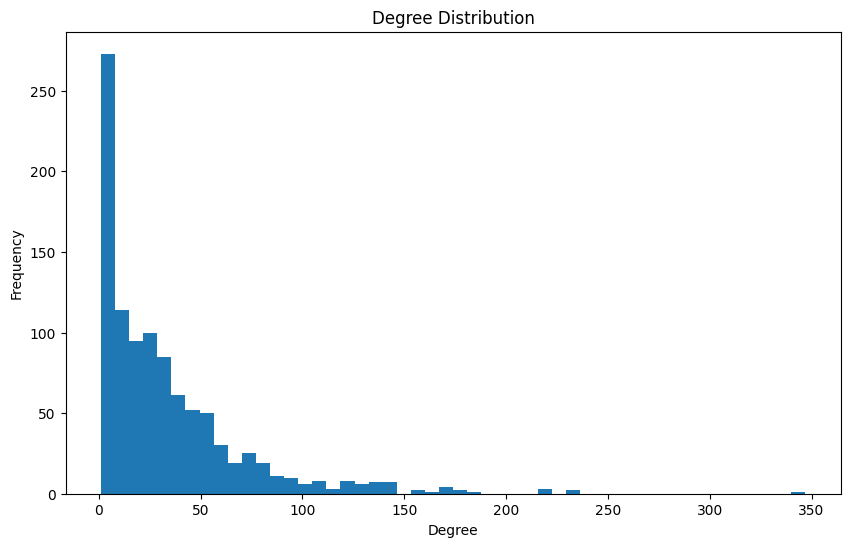

In [ ]:
# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


Missing labels: 0


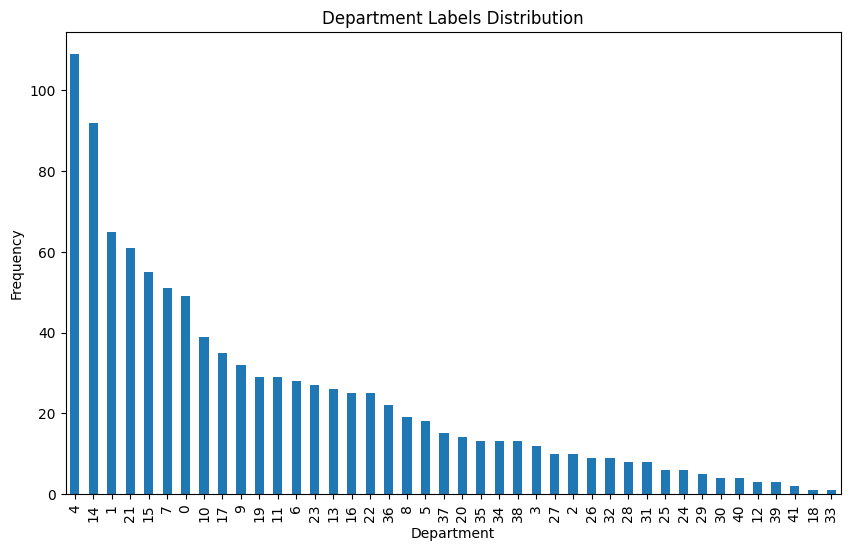

In [ ]:
# Merge the labels with the graph data
nodes_data = pd.DataFrame(G.nodes(), columns=['node'])
nodes_data = nodes_data.merge(labels_df, on='node', how='left')

# Check for missing labels
missing_labels = nodes_data['department'].isnull().sum()
print(f"Missing labels: {missing_labels}")

# Visualize department distribution
plt.figure(figsize=(10, 6))
nodes_data['department'].value_counts().plot(kind='bar')
plt.title('Department Labels Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import community as community_louvain
# Use the Louvain method for community detection
partition = community_louvain.best_partition(G)

# Add the partition as a node attribute
nx.set_node_attributes(G, partition, 'community')

# Check the partition result
print("Community partition:")
print(partition)


Community partition:
{0: 0, 1: 0, 2: 13, 3: 13, 4: 13, 5: 13, 6: 13, 7: 2, 8: 2, 9: 2, 10: 3, 11: 2, 12: 2, 13: 4, 14: 5, 15: 6, 16: 3, 17: 0, 18: 0, 19: 2, 20: 3, 21: 3, 22: 3, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 5, 42: 3, 43: 2, 44: 2, 45: 6, 46: 6, 47: 4, 48: 4, 49: 3, 50: 3, 51: 5, 52: 9, 53: 5, 54: 13, 55: 13, 56: 13, 57: 13, 58: 13, 59: 13, 60: 9, 61: 9, 62: 3, 63: 13, 64: 5, 65: 5, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 0, 74: 0, 75: 4, 76: 4, 77: 3, 78: 3, 79: 5, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 0, 86: 5, 87: 3, 88: 13, 89: 13, 90: 3, 91: 3, 92: 3, 93: 4, 94: 5, 95: 5, 96: 4, 97: 6, 98: 6, 99: 6, 100: 6, 101: 6, 102: 13, 103: 9, 104: 9, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 4, 114: 4, 115: 4, 116: 4, 117: 3, 118: 3, 119: 4, 120: 0, 121: 3, 122: 9, 123: 4, 124: 6, 125: 6, 126: 13, 127: 3, 128: 5, 129: 5, 130: 9, 131: 13, 132: 13, 133: 4

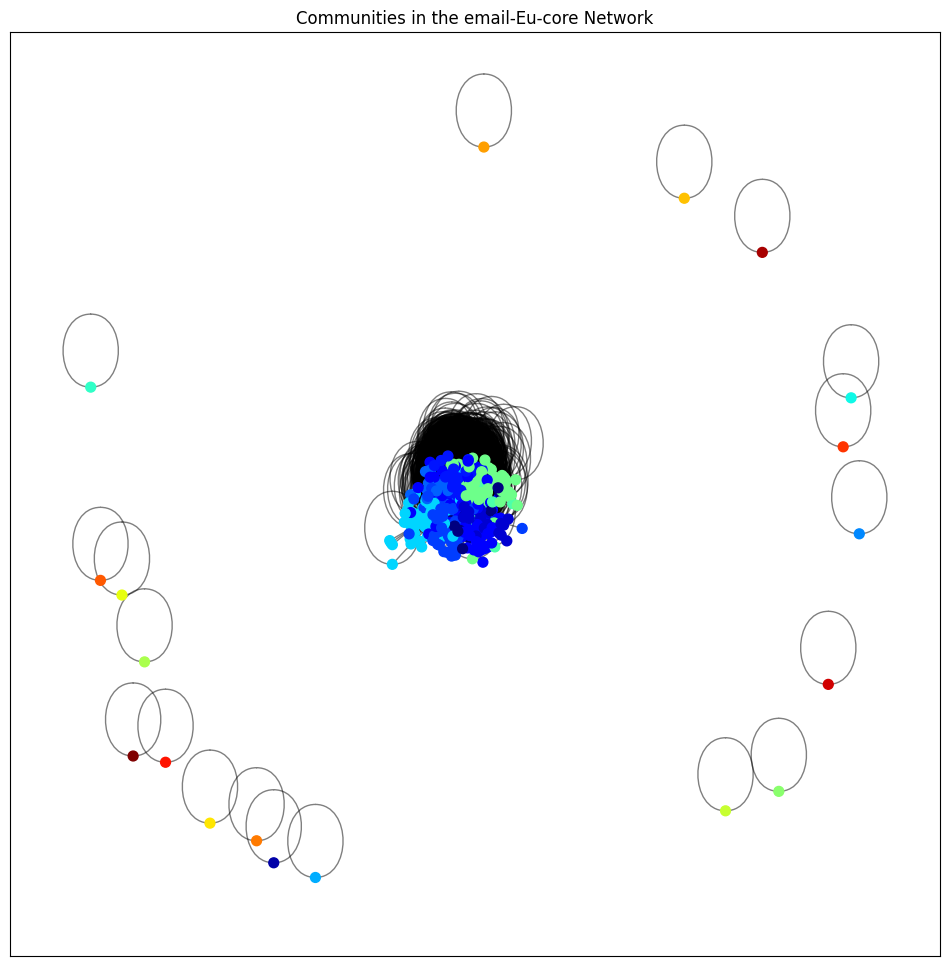

In [ ]:
# Define colors for communities
community_colors = [partition[node] for node in G.nodes()]

# Draw the graph with node colors based on community
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw_networkx_nodes(G, pos, node_color=community_colors, cmap=plt.cm.jet, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communities in the email-Eu-core Network")
plt.show()


In [ ]:
# Compute network density
density = nx.density(G)
print(f"Network Density: {density:.4f}")

# Compute the average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")


Network Density: 0.0331
Average Clustering Coefficient: 0.3994


In [ ]:
# Compute degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Display the top 5 nodes by degree centrality
top_5_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Nodes by Degree Centrality:")
for node, centrality in top_5_degree_centrality:
    print(f"Node {node}: {centrality:.4f}")


Top 5 Nodes by Degree Centrality:
Node 160: 0.3456
Node 121: 0.2331
Node 82: 0.2321
Node 107: 0.2201
Node 86: 0.2171


In [ ]:
# Compute betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Display the top 5 nodes by betweenness centrality
top_5_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Nodes by Betweenness Centrality:")
for node, centrality in top_5_betweenness_centrality:
    print(f"Node {node}: {centrality:.4f}")


Top 5 Nodes by Betweenness Centrality:
Node 160: 0.0874
Node 86: 0.0378
Node 5: 0.0310
Node 82: 0.0279
Node 121: 0.0278


In [ ]:
# Basic network properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
num_connected_components = nx.number_connected_components(G)

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Network Density: {density}")
print(f"Number of Connected Components: {num_connected_components}")


Number of Nodes: 1005
Number of Edges: 16706
Network Density: 0.03311331787278746
Number of Connected Components: 20


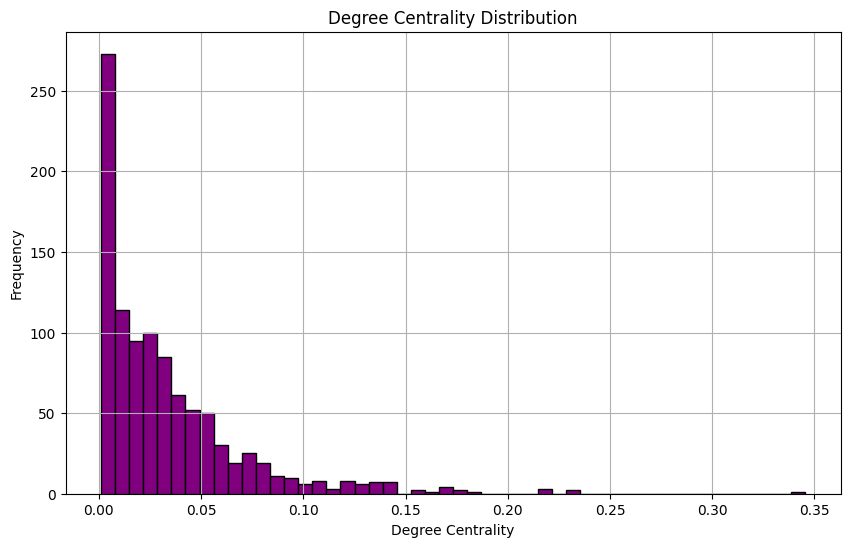

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Convert to DataFrame for better visualization
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['degree_centrality'])

# Plot degree centrality distribution
plt.figure(figsize=(10, 6))
degree_centrality_df['degree_centrality'].hist(bins=50, color='purple', edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()


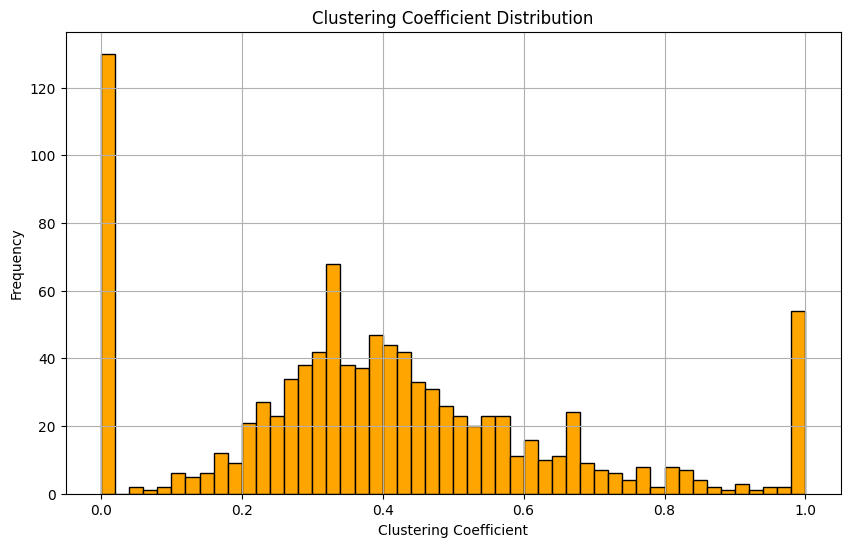

In [ ]:
# Calculate clustering coefficient
clustering_coefficient = nx.clustering(G)

# Convert to DataFrame for better visualization
clustering_coefficient_df = pd.DataFrame.from_dict(clustering_coefficient, orient='index', columns=['clustering_coefficient'])

# Plot clustering coefficient distribution
plt.figure(figsize=(10, 6))
clustering_coefficient_df['clustering_coefficient'].hist(bins=50, color='orange', edgecolor='black')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()


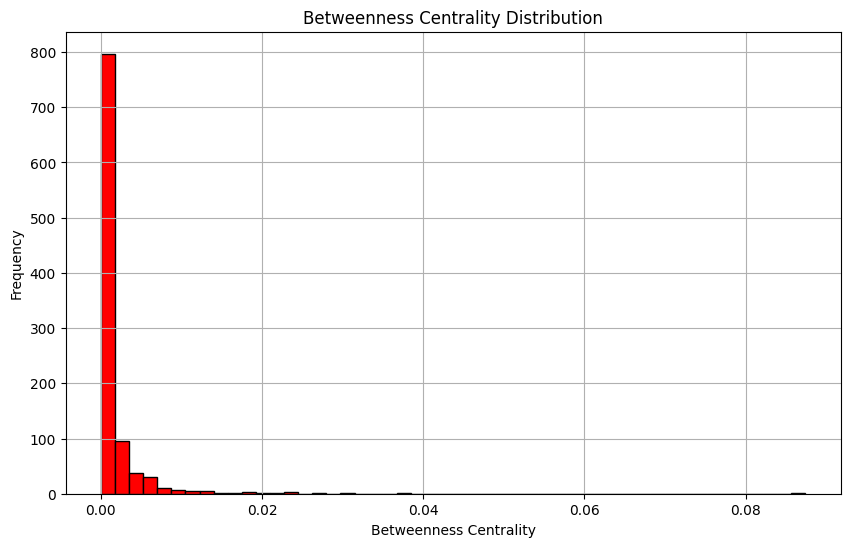

In [ ]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame for better visualization
betweenness_centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['betweenness_centrality'])

# Plot betweenness centrality distribution
plt.figure(figsize=(10, 6))
betweenness_centrality_df['betweenness_centrality'].hist(bins=50, color='red', edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()


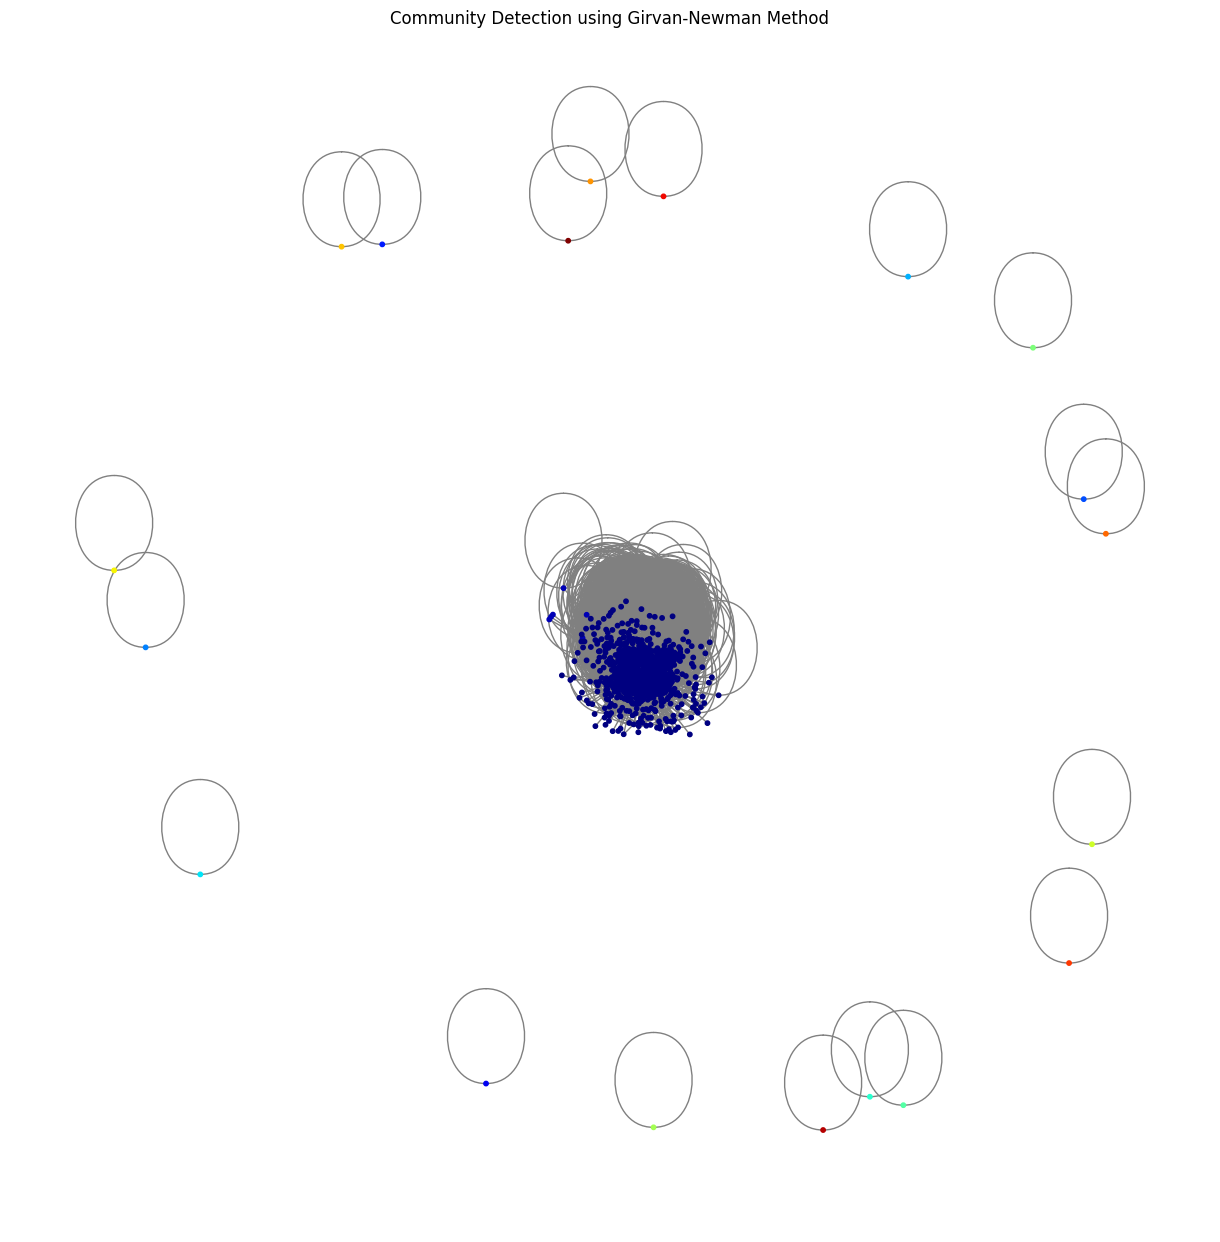

In [ ]:
from networkx.algorithms.community import girvan_newman

# Detect communities using the Girvan-Newman method
communities = girvan_newman(G)
top_level_communities = next(communities)
community_map = {node: idx for idx, community in enumerate(top_level_communities) for node in community}

# Add community info to the DataFrame
nodes_df = pd.DataFrame(G.nodes(), columns=['node'])
nodes_df['community'] = nodes_df['node'].map(community_map)

# Plot the communities
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=nodes_df['community'], with_labels=False, node_size=10, cmap=plt.cm.jet, edge_color='gray')
plt.title('Community Detection using Girvan-Newman Method')
plt.show()


In [ ]:
import networkx as nx

# Load the graph
edges_file = 'email-Eu-core.txt'
G = nx.read_edgelist(edges_file, nodetype=int)

# Check if the graph is connected
is_connected = nx.is_connected(G)

print(f"The Email-Eu-core network is {'connected' if is_connected else 'not connected'}.")


The Email-Eu-core network is not connected.


The largest connected component is connected.
Number of nodes in the largest connected component: 986
Number of edges in the largest connected component: 16687


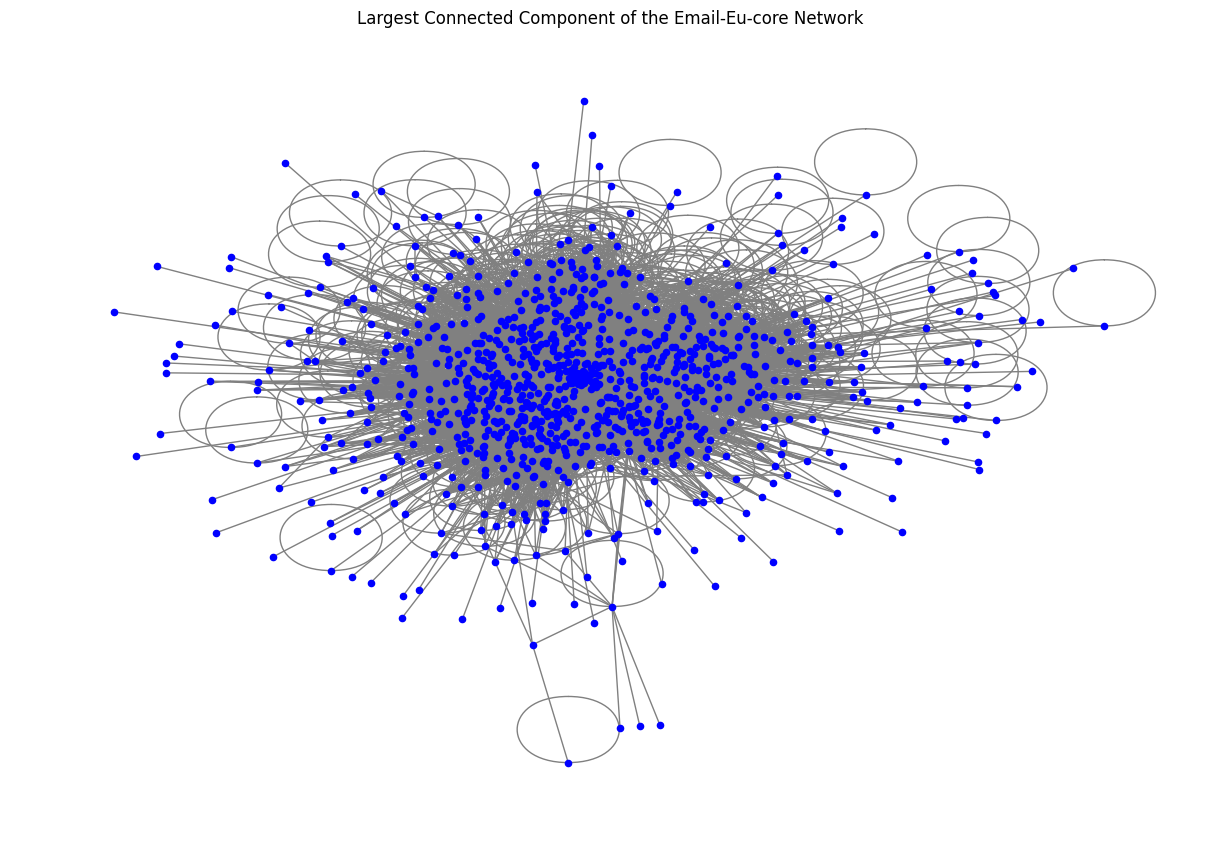

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the graph
edges_file = 'email-Eu-core.txt'
G = nx.read_edgelist(edges_file, nodetype=int)

# Find connected components
connected_components = list(nx.connected_components(G))

# Find the largest connected component
largest_cc = max(connected_components, key=len)
G_largest_cc = G.subgraph(largest_cc).copy()

# Check properties of the largest connected component
is_largest_cc_connected = nx.is_connected(G_largest_cc)
num_nodes_largest_cc = G_largest_cc.number_of_nodes()
num_edges_largest_cc = G_largest_cc.number_of_edges()

print(f"The largest connected component is {'connected' if is_largest_cc_connected else 'not connected'}.")
print(f"Number of nodes in the largest connected component: {num_nodes_largest_cc}")
print(f"Number of edges in the largest connected component: {num_edges_largest_cc}")

# Plot the largest connected component
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_largest_cc)
nx.draw(G_largest_cc, pos, node_size=20, node_color='blue', edge_color='gray')
plt.title('Largest Connected Component of the Email-Eu-core Network')
plt.show()
